In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [3]:
 data = pd.read_csv(r"D:\assignment\crimes_against_women_2001-2021.csv")

In [4]:
data

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
16684,16684,Ladakh,Kargil,2021,1,1,0,2,0,1,0
16685,16685,Ladakh,Leh,2021,1,0,0,3,1,8,0
16686,16686,Lakshadweep,Lakshadweep,2021,0,0,0,1,1,3,0
16687,16687,Puducherry,Karaikal,2021,0,0,0,0,0,0,0


# missing values 

In [5]:
data.isnull().sum()

Unnamed: 0                                             0
STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

# Skewness

In [6]:
data.skew()

C:\Users\ravin\AppData\Local\Temp\ipykernel_20684\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


Unnamed: 0                                              0.000000
Year                                                   -0.087286
Rape                                                   12.579733
Kidnapping and Abduction                               17.853784
Dowry Deaths                                           19.199499
Assault on women with intent to outrage her modesty    13.014948
Insult to modesty of Women                             20.586877
Cruelty by Husband or his Relatives                    14.569229
Importation of Girls                                   26.757668
dtype: float64

# Extreme Values

In [7]:
data.kurtosis()

C:\Users\ravin\AppData\Local\Temp\ipykernel_20684\2361870383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


Unnamed: 0                                              -1.200000
Year                                                    -1.196283
Rape                                                   208.188071
Kidnapping and Abduction                               485.696717
Dowry Deaths                                           459.957251
Assault on women with intent to outrage her modesty    217.981288
Insult to modesty of Women                             533.550033
Cruelty by Husband or his Relatives                    283.999892
Importation of Girls                                   868.094137
dtype: float64

# Data Preprocessing

In [8]:
data1 = data.drop(['Unnamed: 0'], axis=1)

# Distribution of data

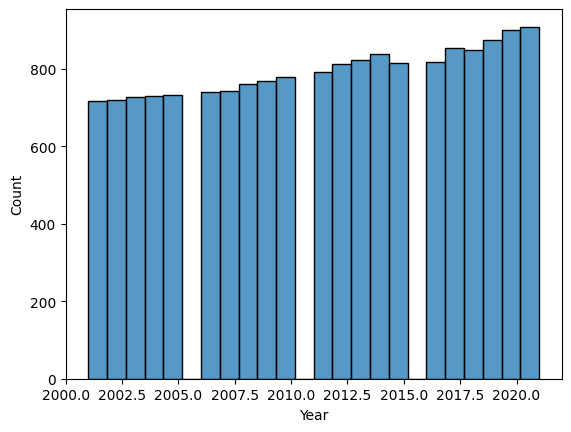

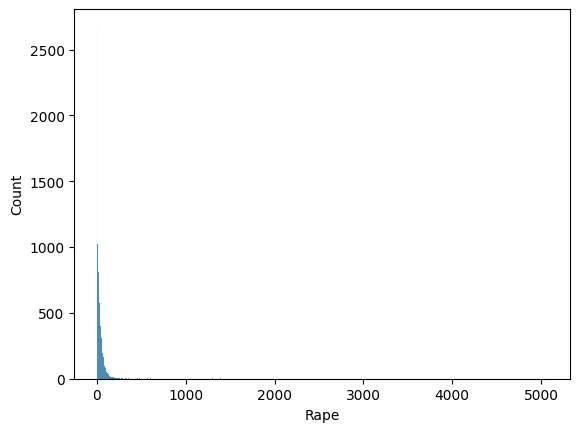

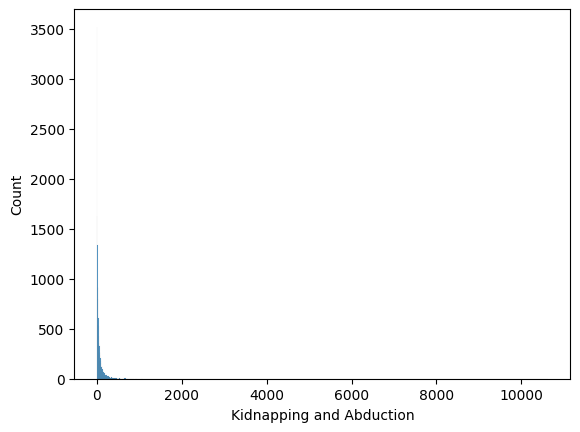

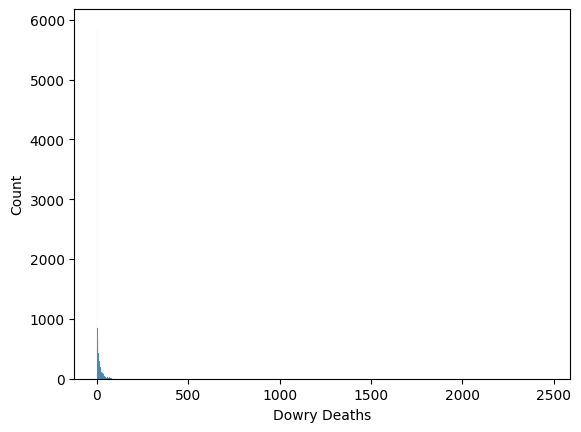

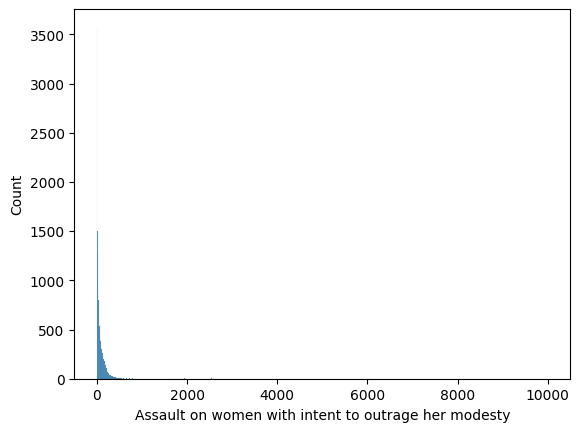

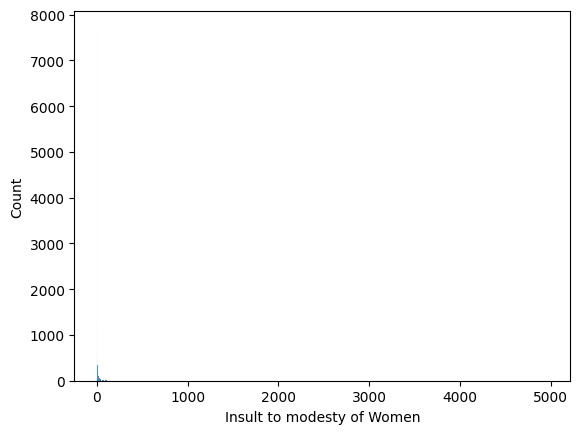

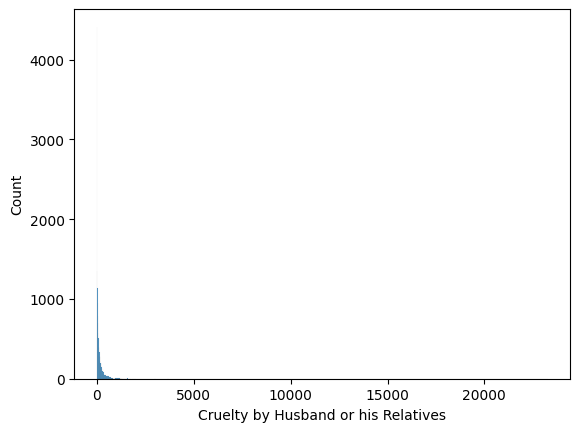

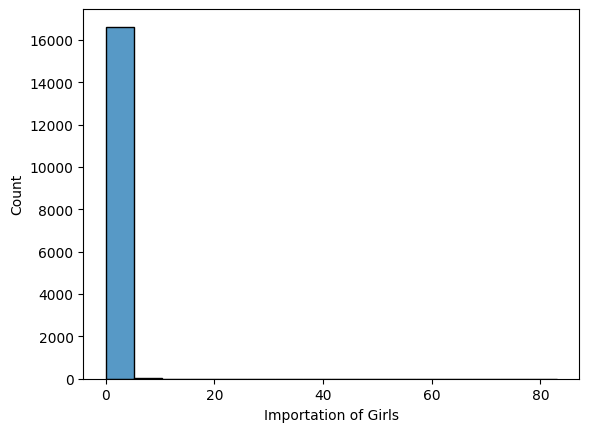

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data1.columns:
    if data1[column].dtypes != 'object':
        sns.histplot(data=data1, x=column)
        plt.show()

# spread of data

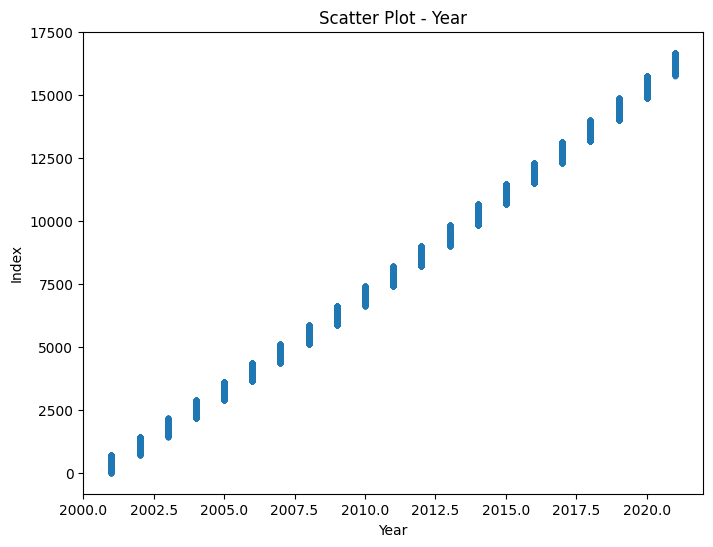

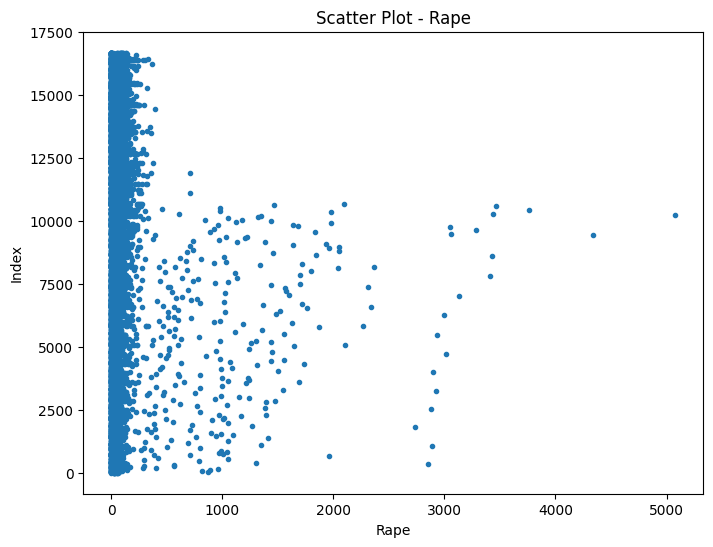

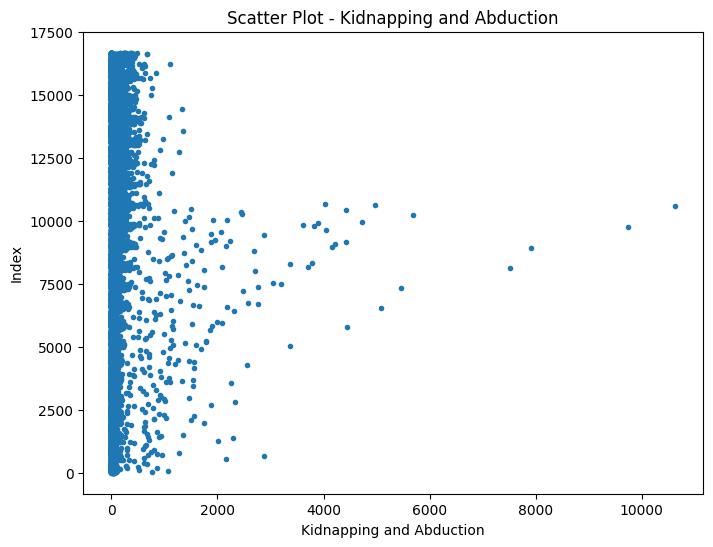

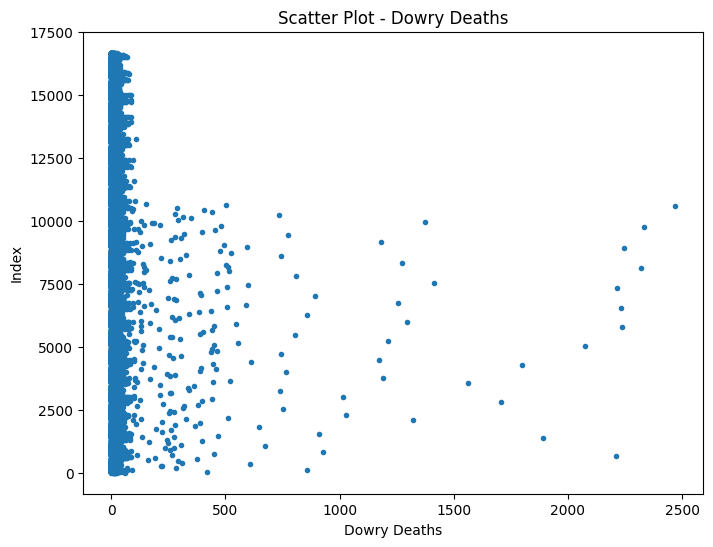

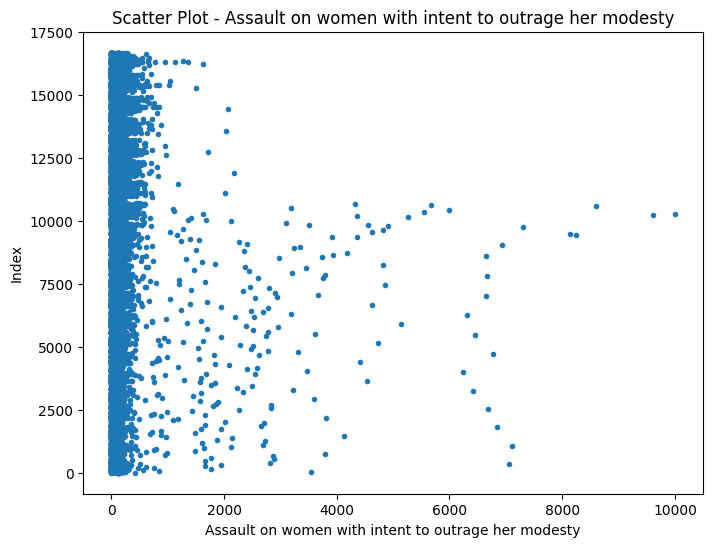

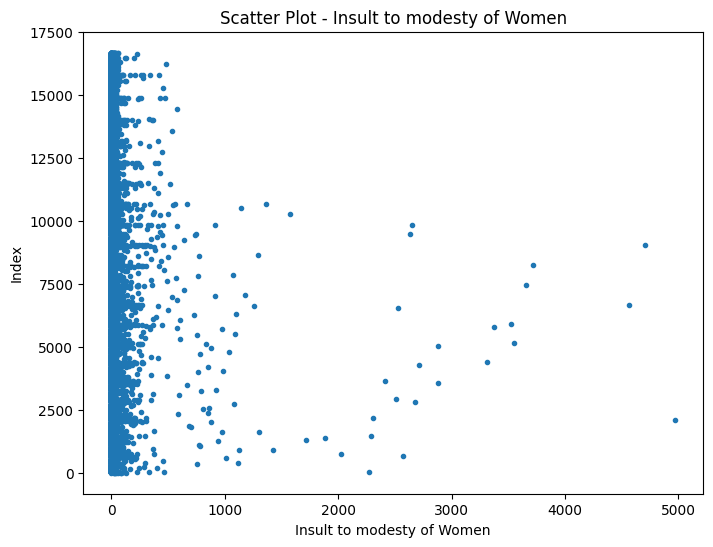

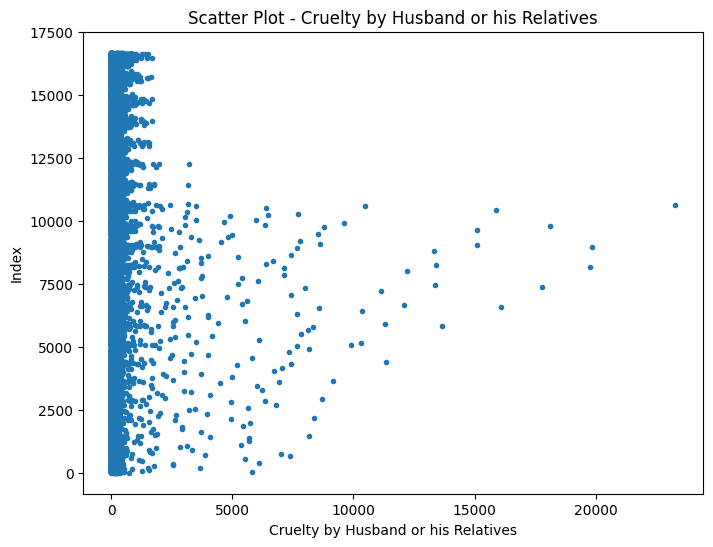

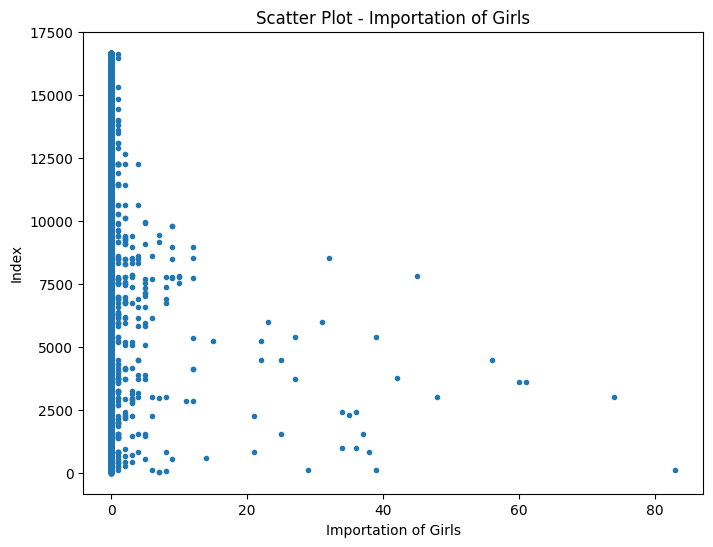

In [10]:
import matplotlib.pyplot as plt

for column in data1.columns:
    if data1[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(data1[column], range(len(data1)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()


# Outliers Removal

In [11]:
import numpy as np

In [12]:
mean = np.mean(data1)
std = np.std(data1)
threshold = 3
z_scores = (data1 - mean) / std
outliers = data1[np.abs(z_scores) > threshold]
df = data1[~data1.isin(outliers)].dropna()

C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\ravin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=o

In [13]:
data1.shape

(16689, 10)

In [14]:
df.shape

(16363, 10)

In [15]:
(16689-16363)/16363*100

1.9922997005439103

# after removing outliers

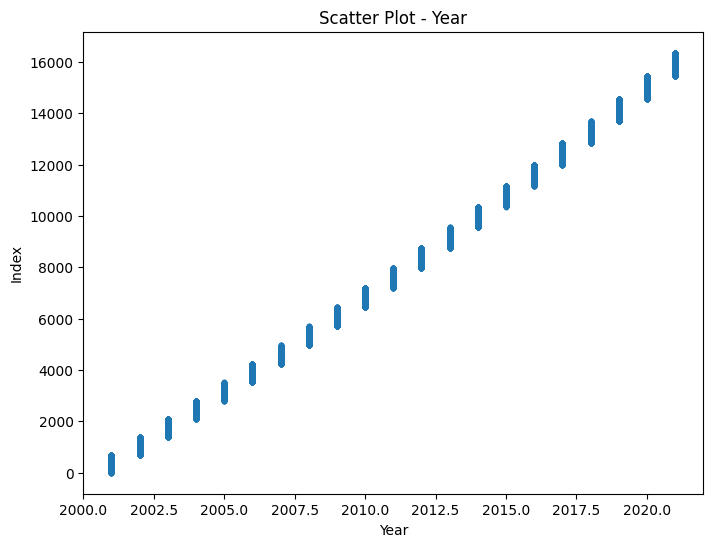

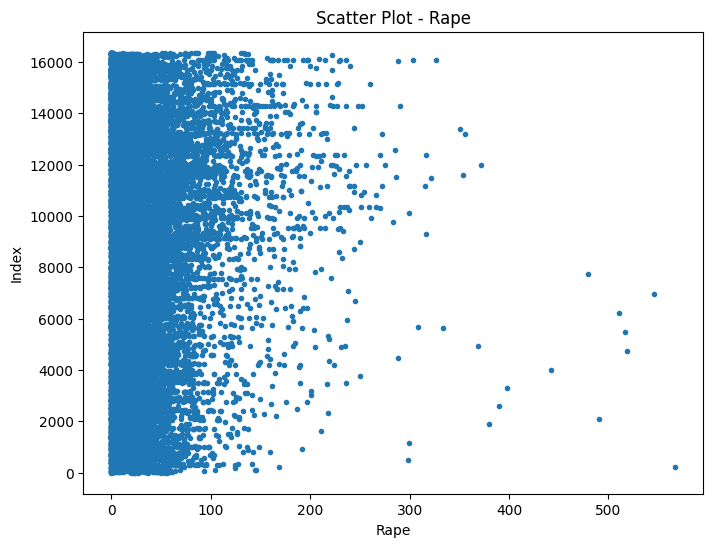

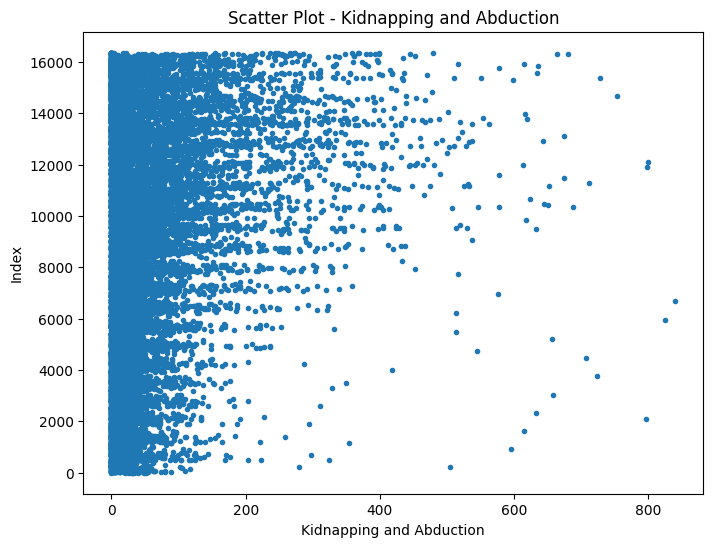

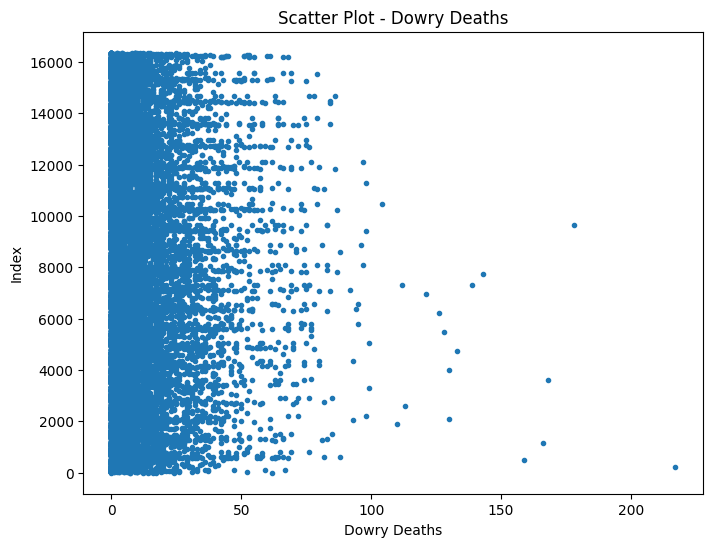

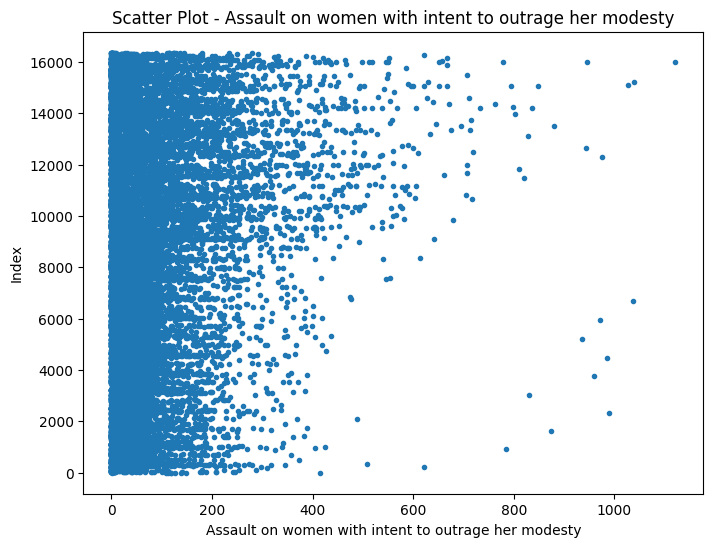

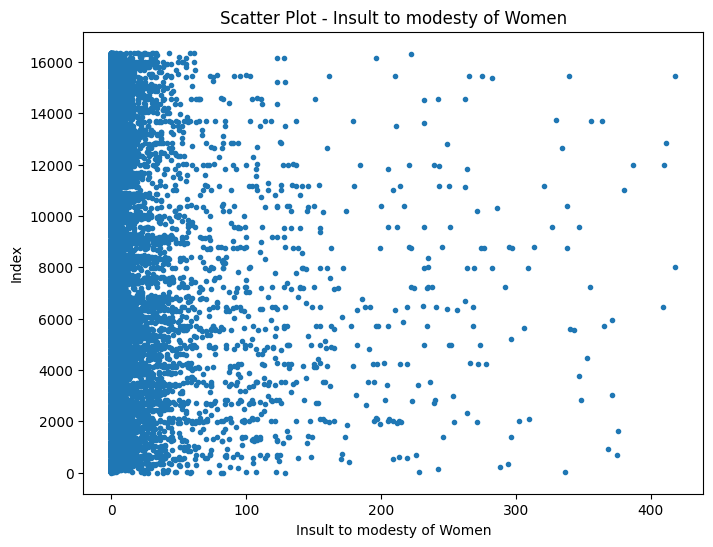

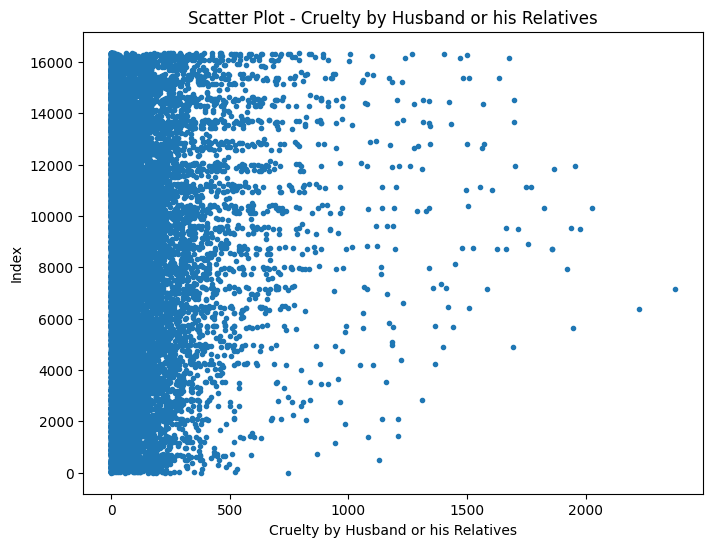

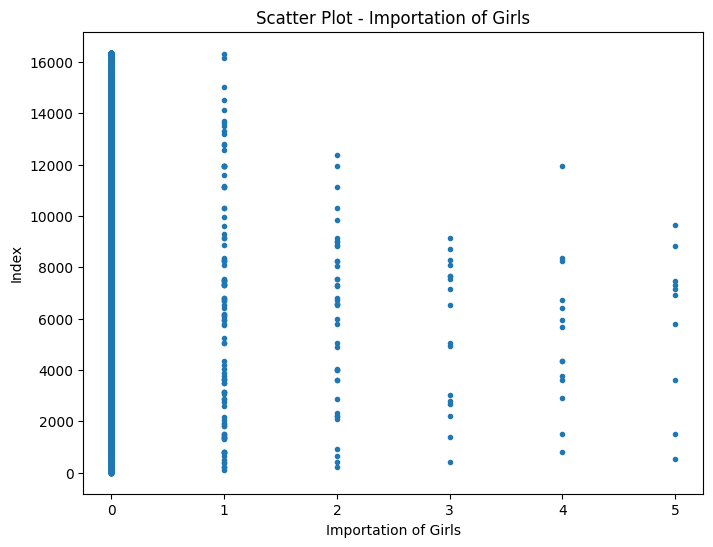

In [16]:
import matplotlib.pyplot as plt

for column in df.columns:
    if df[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(df[column], range(len(df)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()

# encoding 

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['STATE/UT'] = label.fit_transform(df['STATE/UT'])
df['DISTRICT'] = label.fit_transform(df['DISTRICT'])

In [18]:
df1 = df.reset_index()

In [19]:
df2 = df1.drop(['index'], axis=1)

In [20]:
df2

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,11,3,2001,50.0,30.0,16.0,149.0,34.0,175.0,0.0
1,11,31,2001,23.0,30.0,7.0,118.0,24.0,154.0,0.0
2,11,297,2001,27.0,34.0,14.0,112.0,83.0,186.0,0.0
3,11,321,2001,20.0,20.0,17.0,126.0,38.0,57.0,0.0
4,11,472,2001,23.0,26.0,12.0,109.0,58.0,247.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16358,50,902,2021,1.0,1.0,0.0,2.0,0.0,1.0,0.0
16359,50,995,2021,1.0,0.0,0.0,3.0,1.0,8.0,0.0
16360,51,990,2021,0.0,0.0,0.0,1.0,1.0,3.0,0.0
16361,68,899,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Normalisation after removing outliers and encoding

In [21]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import normalize

In [22]:
scaled = pd.DataFrame(normalize(df2))
# scaled = pd.DataFrame(ss.fit_transform(df2))

In [23]:
scaled

,0,1,2,3,4,5,6,7,8,9
0,0.005458,0.001489,0.992863,0.024809,0.014886,0.007939,0.073931,0.016870,0.086832,0.0
1,0.005469,0.015414,0.994947,0.011436,0.014917,0.003481,0.058673,0.011933,0.076573,0.0
2,0.005401,0.145819,0.982437,0.013256,0.016693,0.006874,0.054989,0.040751,0.091321,0.0
3,0.005414,0.157976,0.984768,0.009843,0.009843,0.008366,0.062009,0.018701,0.028052,0.0
4,0.005302,0.227499,0.964462,0.011086,0.012532,0.005784,0.052537,0.027955,0.119052,0.0
...,...,...,...,...,...,...,...,...,...,...
16358,0.022586,0.407459,0.912943,0.000452,0.000452,0.000000,0.000903,0.000000,0.000452,0.0
16359,0.022190,0.441588,0.896935,0.000444,0.000000,0.000000,0.001331,0.000444,0.003550,0.0
16360,0.022656,0.439798,0.897810,0.000000,0.000000,0.000000,0.000444,0.000444,0.001333,0.0
16361,0.030728,0.406240,0.913250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


# after Normalisation spread of data

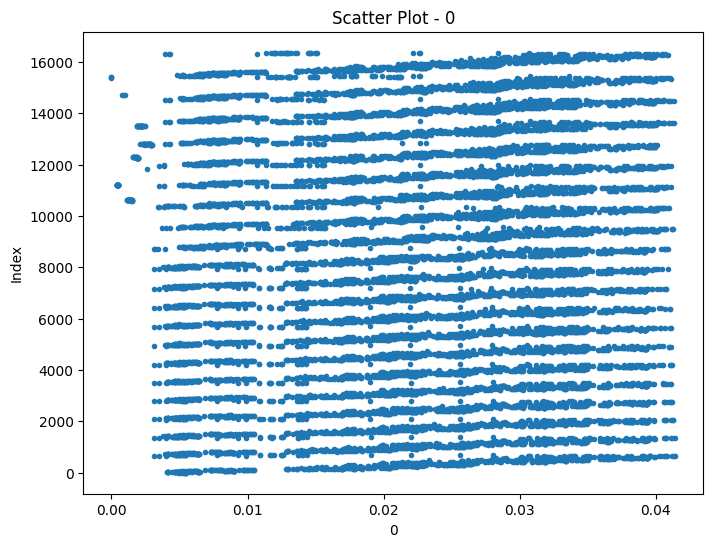

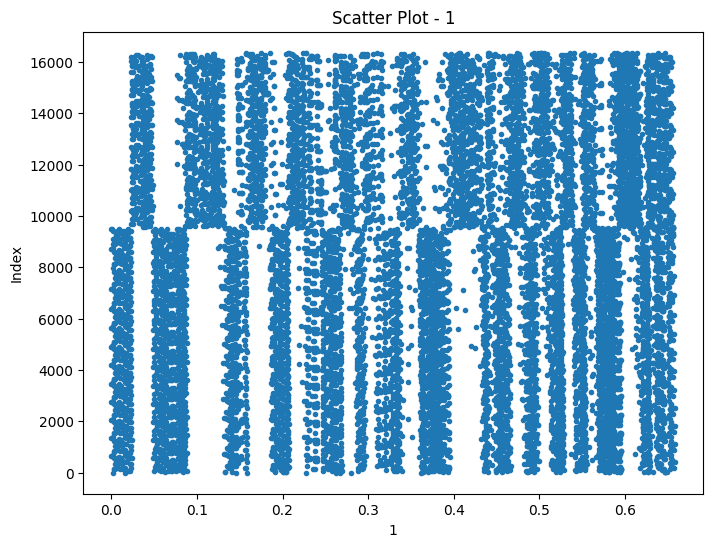

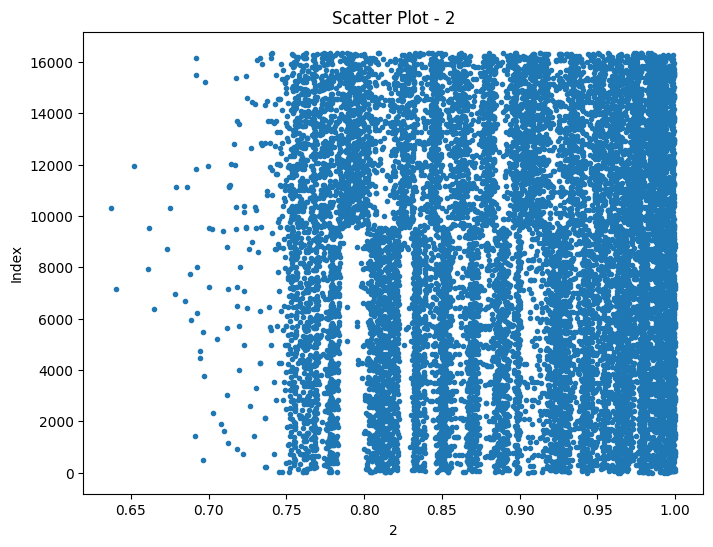

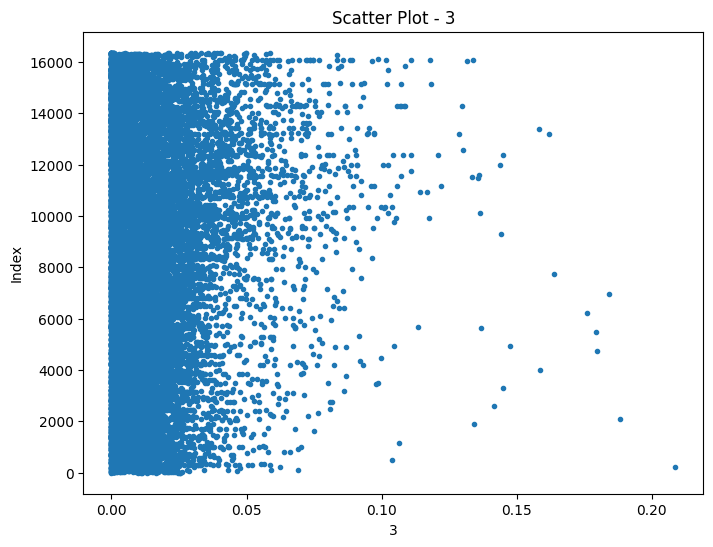

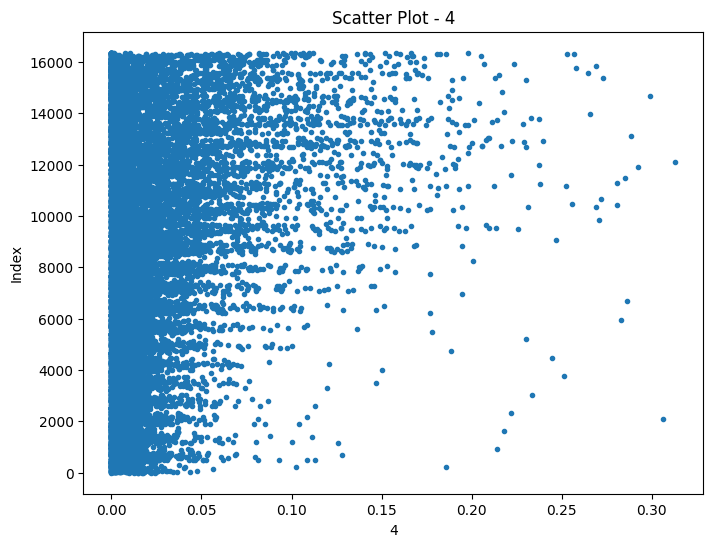

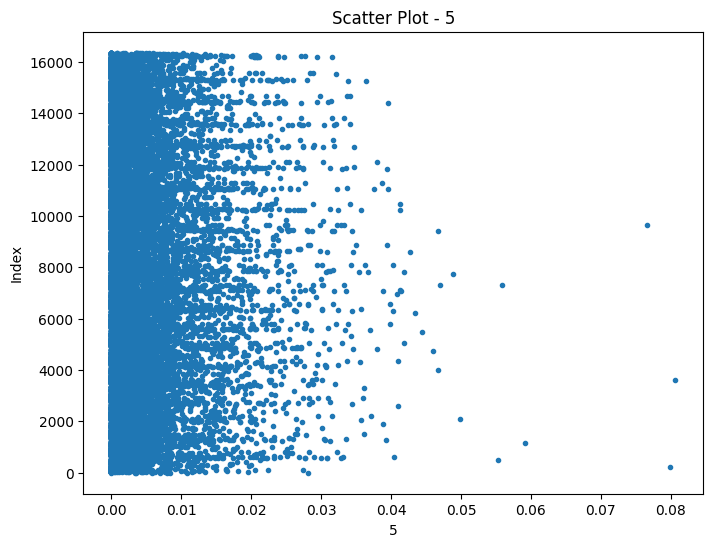

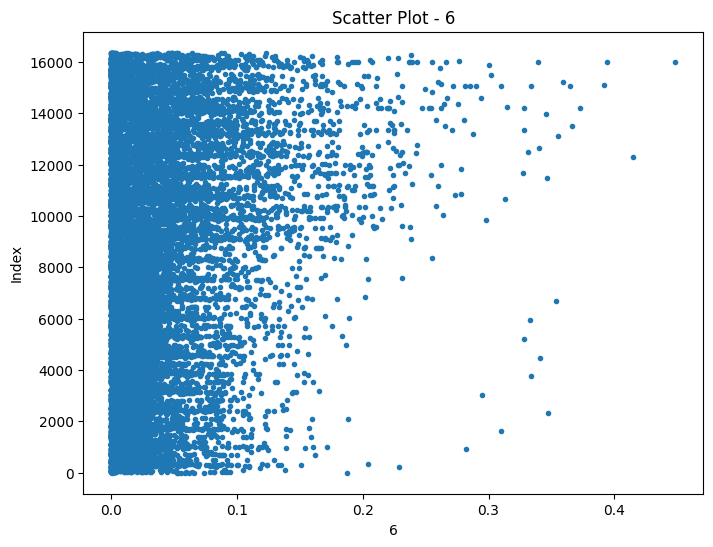

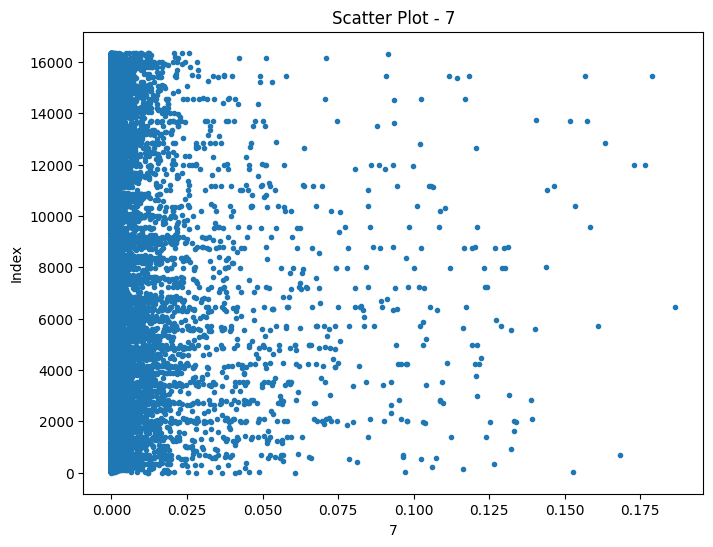

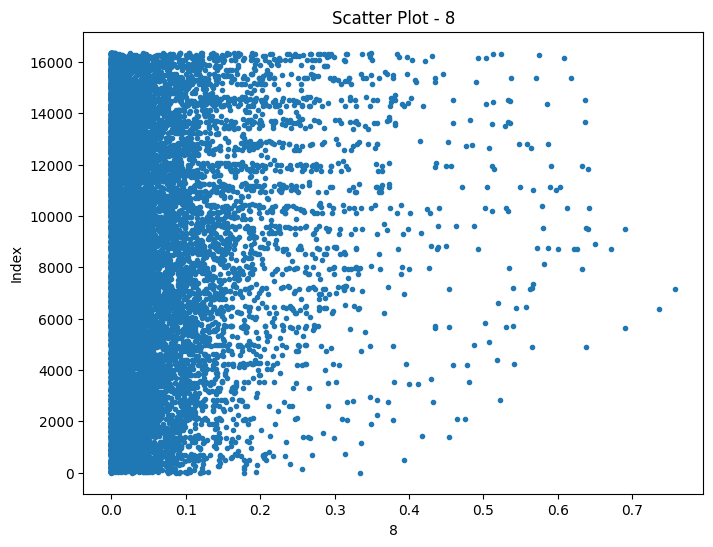

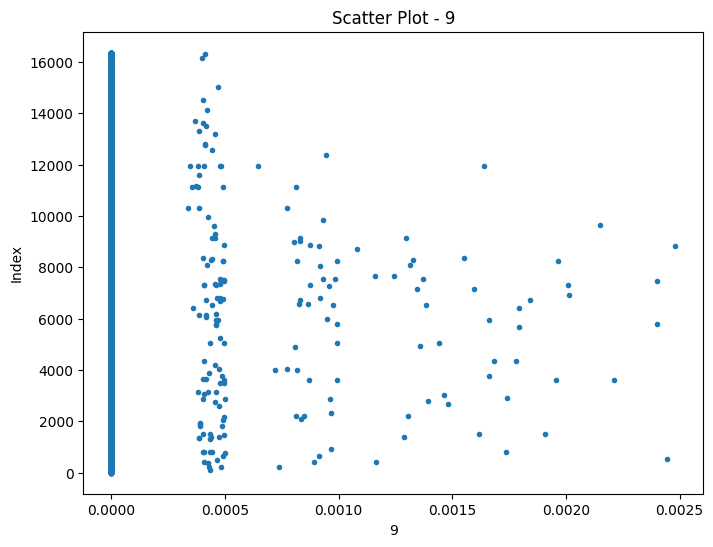

In [24]:
import matplotlib.pyplot as plt

for column in scaled.columns:
    if scaled[column].dtype != 'object':
        plt.figure(figsize=(8, 6))
        plt.scatter(scaled[column], range(len(scaled)), marker='.')
        plt.title(f"Scatter Plot - {column}")
        plt.xlabel(column)
        plt.ylabel('Index')
        plt.show()

# Elbow Method

In [25]:
from sklearn.cluster import KMeans

In [26]:
elbow = pd.DataFrame()

for i in range(1,15):
    kmean = KMeans(n_clusters=i, random_state=333)
    model = kmean.fit(df2)
    elbow.at[i,'k'] = i
    elbow.at[i, 'inertia'] = round(model.inertia_)/10000000
print(elbow)
    

       k     inertia
1    1.0  519.250207
2    2.0  193.256317
3    3.0  136.432039
4    4.0  109.972595
5    5.0   89.776300
6    6.0   79.845802
7    7.0   70.897180
8    8.0   64.506511
9    9.0   59.208780
10  10.0   54.433277
11  11.0   50.922082
12  12.0   48.111608
13  13.0   45.711623
14  14.0   43.890050


Text(0, 0.5, 'inertia')

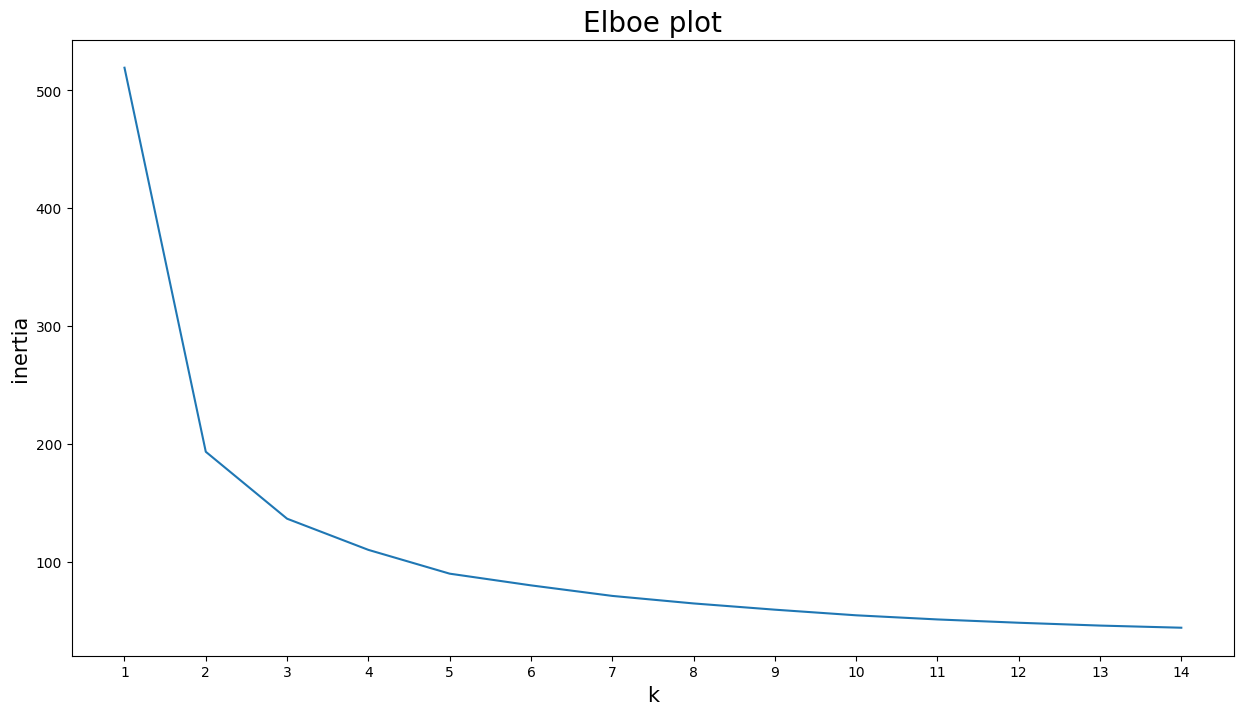

In [27]:
plt.figure(figsize=(15,8))
plt.title('Elboe plot', size=20)
plt.plot(elbow['k'], elbow['inertia'])
plt.xticks(elbow['k'])
plt.xlabel('k', size=15)
plt.ylabel('inertia', size=15)

In [28]:
df1 = pd.DataFrame()
kmeans = KMeans(n_clusters = 4,  random_state = 42)

y_kmeans = kmeans.fit_predict(df)

df1['y_kmeans']=y_kmeans

df1['y_kmeans'].value_counts()

1    5397
2    5322
3    5021
0     623
Name: y_kmeans, dtype: int64

In [29]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(df, y_kmeans)
print("Silhouette Coefficient:", silhouette_avg)


Silhouette Coefficient: 0.4500451449562219


# Hierarchical Clustering

In [30]:
data3 = scaled.copy()

In [31]:
import scipy.cluster.hierarchy as shc

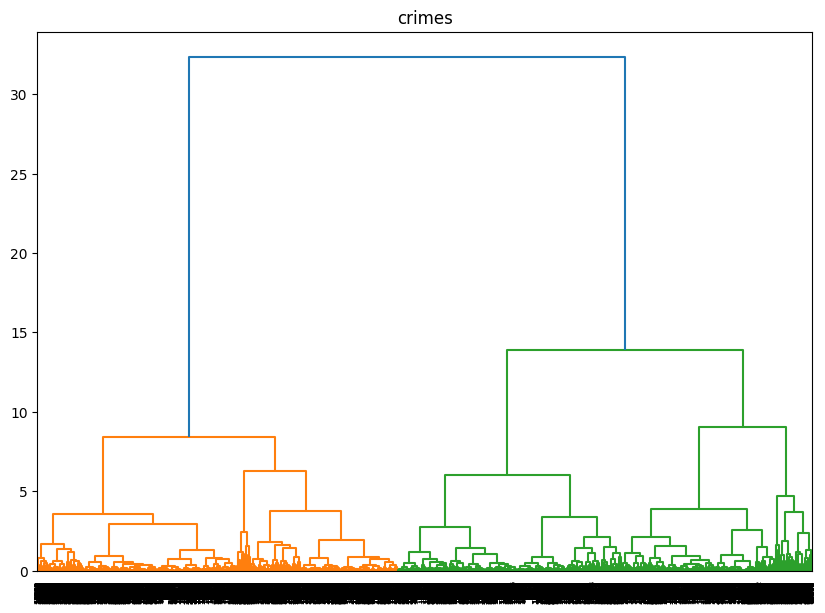

In [32]:
plt.figure(figsize=(10,7))
plt.title('crimes')
dend = shc.dendrogram(shc.linkage(data3, method='ward'))

# model Buidling

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
cluster =  AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')

In [35]:
labels = cluster.fit_predict(data3)

# accuracy_score

In [36]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(data3, labels)
print("Silhouette Coefficient:", silhouette_avg)


Silhouette Coefficient: 0.5104194622211703


# DBSCAN Clustring

# Optimal number of eposilon

In [37]:
from sklearn.neighbors import NearestNeighbors
k = 5 
neighbors = NearestNeighbors(n_neighbors=k)


nb = neighbors.fit(scaled)
distance, indicate = nb.kneighbors(scaled)

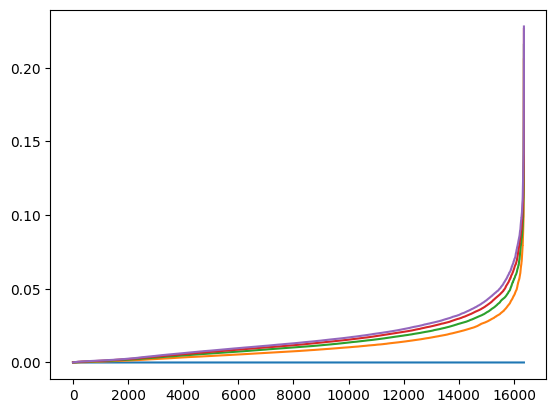

In [38]:
distances = np.sort(distance, axis=0)
plt.plot(distances)

# Model Building

In [45]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.16, min_samples=3)
db.fit(scaled)

DBSCAN(eps=0.16, min_samples=3)

In [46]:
clusters = db.labels_

In [47]:
len(set(clusters))

2

In [48]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(scaled, clusters)
print("Silhouette Coefficient:", silhouette_avg)


Silhouette Coefficient: 0.5525101572110176
